In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_SEED = 42

In [ ]:
features_dataset = pd.read_csv('/content/drive/MyDrive/ML/archive/data/Training_set_values.csv', index_col="id")
test_dataset = pd.read_csv('/content/drive/MyDrive/ML/archive/data/Test_set_values.csv', index_col="id")
labels_dataset = pd.read_csv('/content/drive/MyDrive/ML/archive/data/Training_set_labels.csv', index_col="id")

In [ ]:
X = features_dataset
test = test_dataset
y = labels_dataset

In [ ]:
X.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [ ]:
X.shape

(59400, 39)

class distribution

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64


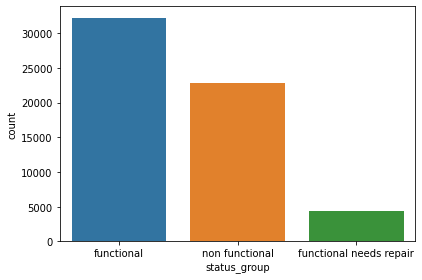

In [ ]:
print(y['status_group'].value_counts(normalize=True))
sns.countplot(x='status_group', data=y)
plt.tight_layout()


Null values and duplicates

In [ ]:
print('\nNull Values in Training \n{}'.format(X.isnull().sum()))
print('\nNull Values in Testing \n{}'.format(test_dataset.isnull().sum()))
print('\nNull Values in Labels \n{}'.format(y.isnull().sum()))


print('\nDuplicated values in train {}'.format(X.duplicated().sum()))
print('Duplicated values in test {}'.format(test_dataset.duplicated().sum()))



Null Values in Training 
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group

In [ ]:
X.dtypes

amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_qual

In [ ]:
joined_train = X.join(y)

remove duplicates in train data

In [ ]:
#Drop duplicates
def drop_duplicates(df):
  df.drop_duplicates(subset=df.columns, keep="first", inplace=True)

drop_duplicates(joined_train)
print('Duplicated values in train {}'.format(joined_train.duplicated().sum()))


Duplicated values in train 0


In [ ]:
X = joined_train.iloc[:,:-1]

In [ ]:
X.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [ ]:
X.shape

(59364, 39)

The processings such as missing value imputation etc. are done using both train and test set featuers.

In [ ]:
df=X.append(test)
print(df.shape)

(74214, 39)


#Missing value imputation

* ```funder```-replace by 'other'.
* ```installer```-replace by 'other'.
* ```subvillage``` - using mode of subvillages grouped by region_code wise.
* ```public_meeting``` - using median.
* ```scheme managment``` - using mode of scheme_managment grouped by region wise.
* ```scheme name``` - using mode of scheme_name grouped by region wise.
* ```permit``` - using median.



In [ ]:
funder_l = list(map(str,df["funder"].unique()))
funder_l.sort()
print(funder_l)

['0', 'A/co Germany', 'Aar', 'Abas Ka', 'Abasia', 'Abc-ihushi Development Cent', 'Abd', 'Abdala', 'Abddwe', 'Abdul', 'Abood', 'Abs', 'Aco/germany', 'Acord', 'Acord Ngo', 'Acra', 'Act', 'Act Mara', 'Action Aid', 'Action Contre La Faim', 'Action In A', 'Adap', 'Adb', 'Adf', 'Adp', 'Adp Bungu', 'Adp Mombo', 'Adp/w', 'Adra', 'Af', 'Afdp', 'Afric', 'Africa', 'Africa 2000 Network/undp', 'Africa Amini Alama', 'Africa Project Ev Germany', 'African', 'African 2000 Network', 'African Barrick Gold', 'African Development Bank', 'African Development Foundation', 'African Muslim Agency', 'African Realief Committe Of Ku', 'African Reflections Foundation', 'African Relie', 'Africaone Ltd', 'Africare', 'Afriican Reli', 'Afroz Ismail', 'Afya Department Lindi Rural', 'Agape Churc', 'Agness', 'Agt Church', 'Ahmadia', 'Ai', 'Aic', 'Aic Church', 'Aic Kij', 'Aict', 'Aimgold', 'Aixos', 'Alia', 'Aljazera', 'Ambwene Mwaikek', 'Amref', 'Amrefe', 'Anglican Church', 'Angrikana', 'Anjuman E Seifee', 'Anrikana', 'An

In [ ]:
df['funder'].replace(to_replace=('0', 'nan', None), value='other', inplace=True)

In [ ]:
installer_l = list(map(str,df["installer"].unique()))
installer_l.sort()
print(installer_l)

['-', '0', 'A.D.B', 'AAR', 'ABASIA', 'ABD', 'ABDALA', 'ABDUL', 'AC', 'ACORD', 'ACRA', 'ACT', 'ACT MARA', 'ACTION AID', 'ACTION Aid', 'ACTIVE TANK CO', 'ACTIVE TANK CO LTD', 'AD', 'ADAP', 'ADB', 'ADP', 'ADP Busangi', 'ADRA', 'ADRA /Government', 'ADRA/Government', 'AF', 'AFRICA', 'AFRICA MUSLIM', 'AFRICAN DEVELOPMENT FOUNDATION', 'AFRICAN REFLECTIONS FOUNDATION', 'AGRICAN', 'AGRIKANA', 'AI', 'AIC', 'AIC KI', 'AICT', 'AIMGGOLD', 'AIMGOLD', 'AIXOS', 'ALIA', 'ALLYS', 'AMP Contract', 'AMP Contracts', 'AMP contractor', 'AMREF', 'ANGLI', 'ANGLIKANA CHURCH', 'ANGRIKANA', 'ANREF', 'ANSWAR', 'APM', 'AQAL', 'AQUA BLUES ANGELS', 'AQUA WEL', 'AQUA Wat', 'AQUA Wel', 'AQUAL', 'AQUARMAN DRILLERS', 'ASDP', 'ATIGH BUILDINGS', 'ATT/Total land care', 'AUSTRALIA', 'AUWASA', 'AVEDA', 'Aartisa', 'Abdallah Ally Wazir', 'Abdi Mtili', 'Abraham Palanjo', 'Accra', 'Action Aid', 'Action Contre La Faim', 'Action Contre la Faim', 'Active KMK', 'Active MKM', 'Adam', 'Adam Kea', 'Adam mualuaka', 'Adra', 'Adra /Communit

In [ ]:
df['installer'].replace(to_replace=('0', 'nan', '-', None), value='other', inplace=True)

In [ ]:
subvillage_region_code = df.groupby(['region_code'])['subvillage'].agg(pd.Series.mode)
scheme_name_region_code = df.groupby(['region'])['scheme_name'].agg(pd.Series.mode)
scheme_management_region_code = df.groupby(['region'])['scheme_management'].agg(pd.Series.mode)

In [ ]:
def impute_mode(df,map_df,col,grouped_col):
  df.loc[df[col].isnull(),[col]] = df[df[col].isnull()].apply(
      lambda row: map_df.loc[row[grouped_col]][0],axis=1
  )

In [ ]:
impute_mode(df,subvillage_region_code,'subvillage','region_code')
impute_mode(df,scheme_name_region_code,'scheme_name','region')
impute_mode(df,scheme_management_region_code,'scheme_management','region')


In [ ]:
len(test)

14850

In [ ]:
public_meeting_median = df['public_meeting'].median()
permit_median = df['permit'].median()

In [ ]:
df.loc[df['public_meeting'].isnull(), 'public_meeting'] = public_meeting_median
df.loc[df['permit'].isnull(), 'permit'] = permit_median

## Remove values with low freq

In [ ]:
def remove_less_freq_val(df,col,t):
  cnt = df.groupby(col)[col].count()
  other_list = cnt[cnt<t].index.tolist()
  df[col].replace(to_replace=other_list, value='other', inplace=True)

In [ ]:
remove_less_freq_val(df,"installer",20)
remove_less_freq_val(df,"funder",20)

#longitude and latitudes

(0,0) logitude, latitude values were replaced by the median (logitude,latitude) of the respective region_code

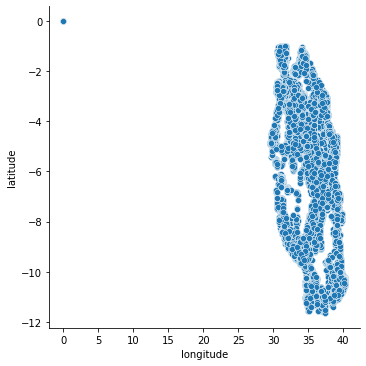

In [ ]:
sns.relplot(
    x="longitude", y="latitude", data=df
);

In [ ]:

df_geo = df.groupby(['region_code'])[['latitude', 'longitude']].median()

In [ ]:
 df.loc[df['longitude'] == 0,['latitude', 'longitude']] = df[df['longitude']==0].apply(
     lambda row: df_geo.loc[row['region_code'],['latitude', 'longitude']],axis=1
)[['latitude', 'longitude']]

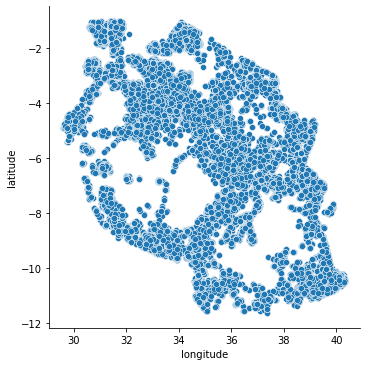

In [ ]:
sns.relplot(
    x="longitude", y="latitude", data=df
);

#Clustering 

A new feature ```Cluster``` was created by clustering longitudes and latitude based on ```population```.

In [ ]:
# clusturing of long and lattitude\
from sklearn.cluster import KMeans
import seaborn as sns

df_l = df.loc[:, ["population", "latitude", "longitude"]]
kmeans = KMeans(n_clusters=8, random_state=RANDOM_SEED)
df_l["Cluster"] = kmeans.fit_predict(df_l)
df_l["Cluster"] = df_l["Cluster"].astype("category")

df_l.head()

,population,latitude,longitude,Cluster
id,,,,
69572,109,-9.856322,34.938093,6
8776,280,-2.147466,34.698766,0
34310,250,-3.821329,37.460664,0
67743,58,-11.155298,38.486161,6
19728,0,-1.825359,31.130847,6


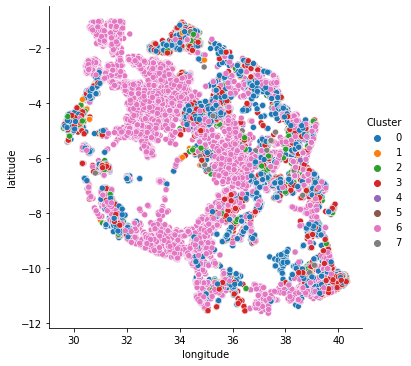

In [ ]:
sns.relplot(
    x="longitude", y="latitude", hue="Cluster", data=df_l
);

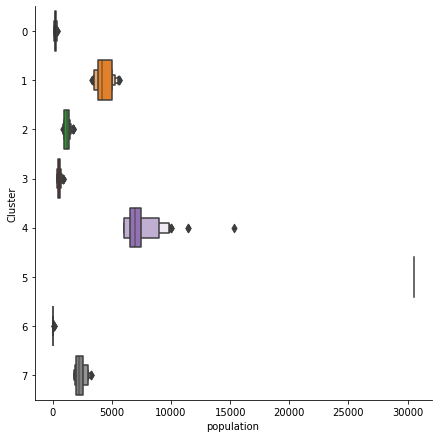

In [ ]:
df_l["population"]  = df["population"] 
sns.catplot(x="population", y="Cluster", data=df_l , kind="boxen", height=6);

In [ ]:
df["Cluster"] = df_l["Cluster"].astype("object")

# ```gps_height``` imputation

In [ ]:
df_gps = df.groupby(['region_code'])[['gps_height']].mean()

In [ ]:
 df.loc[df['gps_height'] == 0,['gps_height']] = df[df['gps_height']==0].apply(
     lambda row: df_gps.loc[row['region_code'],['gps_height']],axis=1
)[['gps_height']]

In [ ]:
df['gps_height'].value_counts()

0.000000       11026
46.430133       6095
0.055954        4173
148.226712      3340
546.299841       579
               ...  
2268.000000        1
2539.000000        1
2278.000000        1
2585.000000        1
2274.000000        1
Name: gps_height, Length: 2467, dtype: int64

# log normalize ```population```

In [ ]:
df.population = df.population.apply(lambda x: np.log10(x+1))

## Re-split data

In [ ]:
test = df[len(X):]
X = df[:len(X)]

print(X.shape)
print(test.shape)

(59364, 40)
(14850, 40)


In [ ]:
print('\nNull Values in Training \n{}'.format(X.isnull().sum()))
print('\nNull Values in Training \n{}'.format(test.isnull().sum()))


Null Values in Training 
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
so

In [ ]:
test.shape

(14850, 40)

In [ ]:
len(X.columns)

40

In [ ]:
y = joined_train["status_group"]

In [ ]:
y.shape

(59364,)

In [ ]:
X.shape

(59364, 40)

In [ ]:
joined_processed_train = X.join(y)

In [ ]:
joined_processed_train.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,Cluster,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390.000000,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,2.041393,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,6,functional
8776,0.0,2013-03-06,Grumeti,1399.000000,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,2.448706,1,GeoData Consultants Ltd,Other,M,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0,functional
34310,25.0,2013-02-25,other,686.000000,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,2.399674,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0,functional
67743,0.0,2013-01-28,Unicef,263.000000,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,1.770852,True,GeoData Consultants Ltd,VWC,B,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,6,non functional
19728,0.0,2011-07-13,other,0.055954,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0.000000,True,GeoData Consultants Ltd,V,K,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,6,functional


In [ ]:
categorical_cols = ['funder', 'installer','wpt_name', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group']

int_cols = ["gps_height","num_private","population","construction_year"]

float_cols = ["amount_tsh","longitude","latitude"]

cols = categorical_cols+int_cols+float_cols+["date_recorded"]

In [ ]:
cat_cols = categorical_cols +["status_group"]

In [ ]:
joined_processed_train_cat = joined_processed_train.loc[:,cat_cols]

#Building-Up featuers

```date recorded``` column was seperated into 2 featuers, ```year``` and ```month```

In [ ]:
joined_processed_train['date_recorded'] = pd.to_datetime(joined_processed_train['date_recorded'])
joined_processed_train['year'] = joined_processed_train['date_recorded'].dt.year
joined_processed_train['month'] = joined_processed_train['date_recorded'].dt.month
joined_processed_train.drop(columns = 'date_recorded', inplace = True)

In [ ]:
test['date_recorded'] = pd.to_datetime(test['date_recorded'])
test['year'] = test['date_recorded'].dt.year
test['month'] = test['date_recorded'].dt.month
test.drop(columns = 'date_recorded', inplace = True)

In [ ]:
joined_processed_train.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,Cluster,status_group,year,month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,Roman,1390.000000,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,2.041393,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,6,functional,2011,3
8776,0.0,Grumeti,1399.000000,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,2.448706,1,GeoData Consultants Ltd,Other,M,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0,functional,2013,3
34310,25.0,other,686.000000,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,2.399674,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0,functional,2013,2
67743,0.0,Unicef,263.000000,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,1.770852,True,GeoData Consultants Ltd,VWC,B,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,6,non functional,2013,1
19728,0.0,other,0.055954,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0.000000,True,GeoData Consultants Ltd,V,K,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,6,functional,2011,7


In [ ]:
print(joined_processed_train.shape)
print(test.shape)

(59364, 42)
(14850, 41)


#Pipeline

steps in the pipline:
1. Convert all categorical columns to string
2. OneHot encoded all the categorical columns
3. All the numerical columns scaled using standard scalar.
4. Trained the data using OneVsRest Classifier with XGBoostClassifier



In [ ]:
from sklearn.preprocessing import (
    OneHotEncoder, 
    StandardScaler, 
    FunctionTransformer)
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
joined_processed_train.dtypes

amount_tsh               float64
funder                    object
gps_height               float64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population               float64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_quality             object
quality_gr

In [ ]:
num_cols = int_cols+float_cols+['year','month']
cat_cols_selected = list(set(joined_processed_train.columns)-set(num_cols)-set(['status_group']))

In [ ]:
l1 = list(set(joined_processed_train.columns)-set(['status_group'])).sort()
l2 = list(set(cat_cols_selected+num_cols)).sort()
l1 == l2

True

In [ ]:
len(cat_cols_selected)+len(num_cols), joined_processed_train.shape

(41, (59364, 42))

In [ ]:
def convert_categorical_to_string(data):
    return pd.DataFrame(data).astype(str)

CategoricalTypeConverter = FunctionTransformer(
    convert_categorical_to_string
)

In [ ]:
categorical_pipeline = Pipeline(
    steps=[
        (
            'typeConverter', 
            CategoricalTypeConverter
        ),
        (
            'standardizer', 
            OneHotEncoder(
                handle_unknown='ignore',
                dtype=float
            )
        )
    ]
)

In [ ]:
numerical_pipeline = Pipeline(
    steps=[
        (
            'standardizer', 
            StandardScaler()
        )
    ]
)

In [ ]:
 preprocessor = ColumnTransformer(
        transformers=[
            (
                'numericalPreprocessor', 
                numerical_pipeline, 
                num_cols
            ),
            (
                'categoricalPreprocessor', 
                categorical_pipeline, 
                cat_cols_selected
            )
        ]
    )

In [ ]:
pipeline = Pipeline(
    steps=[
        (
            'preprocessor', 
            preprocessor
        ),
        (
            'classifier', 
            OneVsRestClassifier(
                estimator=XGBClassifier(max_depth = 20, n_estimators =  250)
            )
        )
    ]
)

In [ ]:
X_selected = joined_processed_train.drop(columns=["status_group"])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, random_state = RANDOM_SEED, test_size=0.1,  stratify=y)

In [ ]:
pipeline.fit(
    X_train, 
    y_train
)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numericalPreprocessor',
                                                  Pipeline(memory=None,
                                                           steps=[('standardizer',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['gps_height', 'num_private',
                                                   'population',
                    

In [ ]:
pred = pipeline.predict(X_test)

In [ ]:
from sklearn import metrics

print("Accuracy: {}".format(metrics.accuracy_score(y_test, pred)))

Accuracy: 0.8209533434394475


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

print("   Accuracy: {}".format(metrics.accuracy_score(y_test, pred)))

print(classification_report(y_test,pred))

   Accuracy: 0.8209533434394475
                         precision    recall  f1-score   support

             functional       0.81      0.92      0.86      3224
functional needs repair       0.61      0.31      0.41       431
         non functional       0.86      0.78      0.82      2282

               accuracy                           0.82      5937
              macro avg       0.76      0.67      0.70      5937
           weighted avg       0.82      0.82      0.81      5937



In [ ]:
pipeline.fit(X_selected,y)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numericalPreprocessor',
                                                  Pipeline(memory=None,
                                                           steps=[('standardizer',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['gps_height', 'num_private',
                                                   'population',
                    

#Create submission file

In [ ]:
X_validate = test
y_validate = pipeline.predict(
    X_validate
)
df_predictions = pd.DataFrame(
    y_validate, 
    index=X_validate.index, 
    columns=['status_group']
)


In [ ]:
df_predictions.head(10)

,status_group
id,
50785,functional
51630,functional
17168,functional
45559,non functional
49871,functional
52449,functional
24806,non functional
28965,non functional
36301,non functional


In [ ]:
df_predictions.to_csv(
    '/content/drive/MyDrive/ML/archive/data/submissions/submission10.csv'
)